In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
from PIL import Image
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
pip install kaggle

In [3]:
# Set kaggle API credentials
os.makedirs(os.path.expanduser(r'C:\Users\damar\.kaggle'), exist_ok=True)
os.chmod(os.path.expanduser(r'C:\Users\damar\.kaggle'), 0o600)

# Download dataset using Kaggle API
!kaggle datasets download -d achmadnoer/alfabet-bisindo

# Unzip dataset
import zipfile

with zipfile.ZipFile('alfabet-bisindo.zip', 'r') as zip_ref:
    zip_ref.extractall('alfabet-bisindo')

Dataset URL: https://www.kaggle.com/datasets/achmadnoer/alfabet-bisindo
License(s): CC0-1.0
 85% 98.0M/115M [00:00<00:00, 184MB/s]
100% 115M/115M [00:00<00:00, 151MB/s] 


In [4]:
#Load data
def load_data(data_dir):
    images = []
    labels = []
    citra_bisindo_dir = os.path.join(data_dir, 'Citra BISINDO')
    for label in os.listdir(citra_bisindo_dir):
        label_dir = os.path.join(citra_bisindo_dir, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                if image_file.endswith('.jpg') or image_file.endswith('.png'):
                    image_path = os.path.join(label_dir, image_file)
                    image = Image.open(image_path)
                    image = image.resize((64, 64))
                    image = np.array(image)
                    images.append(image)
                    labels.append(label)
    return np.array(images), np.array(labels)

data_dir = 'alfabet-bisindo'
images, labels = load_data(data_dir)

In [5]:
# Preprocess data
images = images / 255.0
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
labels_onehot = onehot_encoder.fit_transform(integer_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels_onehot, test_size=0.2, random_state=42)

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [9]:
# Train model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=150)

Epoch 1/150
8/8 [==============================] - 6s 364ms/step - loss: 3.2748 - accuracy: 0.0281 - val_loss: 3.2722 - val_accuracy: 0.0000e+00
Epoch 2/150
8/8 [==============================] - 2s 271ms/step - loss: 3.2584 - accuracy: 0.0241 - val_loss: 3.2675 - val_accuracy: 0.0000e+00
Epoch 3/150
8/8 [==============================] - 2s 273ms/step - loss: 3.2598 - accuracy: 0.0161 - val_loss: 3.2668 - val_accuracy: 0.0000e+00
Epoch 4/150
8/8 [==============================] - 2s 284ms/step - loss: 3.2562 - accuracy: 0.0482 - val_loss: 3.2690 - val_accuracy: 0.0000e+00
Epoch 5/150
8/8 [==============================] - 2s 280ms/step - loss: 3.2576 - accuracy: 0.0241 - val_loss: 3.2716 - val_accuracy: 0.0000e+00
Epoch 6/150
8/8 [==============================] - 4s 466ms/step - loss: 3.2566 - accuracy: 0.0402 - val_loss: 3.2796 - val_accuracy: 0.0000e+00
Epoch 7/150
8/8 [==============================] - 2s 253ms/step - loss: 3.2558 - accuracy: 0.0321 - val_loss: 3.2817 - val_accura

In [10]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

2/2 [==============================] - 0s 62ms/step - loss: 0.2417 - accuracy: 0.9206
Test accuracy: 0.92


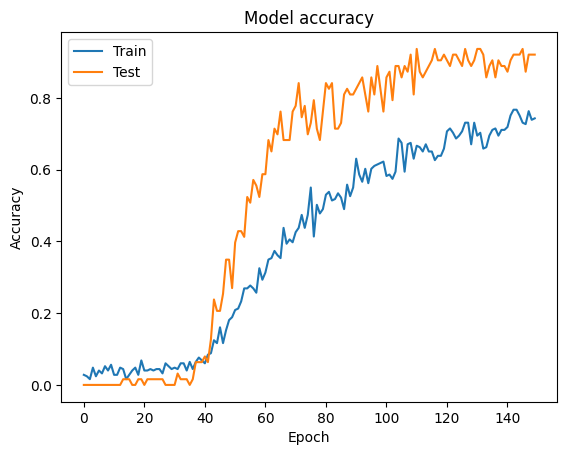

In [11]:
# Plot accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

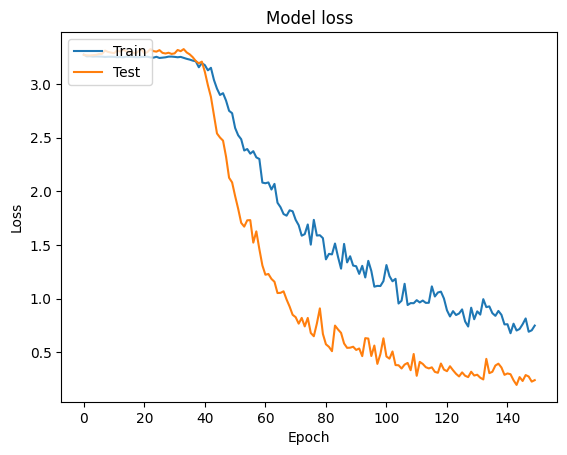

In [12]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()